In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
beoseot = pd.read_csv('../DATA/mushrooms.csv')
beoseot

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
beoseot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class : 버섯의 독성 여부
- 'p' : 독
- 'e' : 식용

cap-shape : 버섯 갓의 형태
- 'b' : 벨
- 'c' : 원추
- 'x' : 평평
- 'f' : 울퉁불퉁
- 'k' : 볼록
- 's' : 오목

cap-surface : 버섯 갓의 표면 상태
- 'f' : 섬유질
- 'g' : 고르지 않은
- 'y' : 비늘 같은
- 's' : 매끈한

cap-color : 버섯 갓의 색상
- 'n' : 갈색
- 'b' : 버프색
- 'c' : 계피색
- 'g' : 회색
- 'r' : 녹색
- 'p' : 분홍색
- 'u' : 자색
- 'e' : 빨간색
- 'w' : 하얀색
- 'y' : 노란색

bruises : 버섯이 상처에 의해 멍이 드는지 여부
- 't' : 멍이 듦
- 'f' : 멍이 들지 않음

odor : 버섯의 냄새
- 'a' : 아몬드 향
- 'l' : 아니스 향
- 'c' : 크레오솟 향
- 'y' : 생선 향
- 'f' : 불쾌한 향
- 'm' : 머스크 향
- 'n' : 무향
- 'p' : 매운 향
- 's' : 흙냄새

In [10]:
for i in beoseot.columns:
    print(f"{i}의 종류 : {beoseot[i].unique()}\n")

class의 종류 : ['p' 'e']

cap-shape의 종류 : ['x' 'b' 's' 'f' 'k' 'c']

cap-surface의 종류 : ['s' 'y' 'f' 'g']

cap-color의 종류 : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises의 종류 : ['t' 'f']

odor의 종류 : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment의 종류 : ['f' 'a']

gill-spacing의 종류 : ['c' 'w']

gill-size의 종류 : ['n' 'b']

gill-color의 종류 : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape의 종류 : ['e' 't']

stalk-root의 종류 : ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring의 종류 : ['s' 'f' 'k' 'y']

stalk-surface-below-ring의 종류 : ['s' 'f' 'y' 'k']

stalk-color-above-ring의 종류 : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring의 종류 : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type의 종류 : ['p']

veil-color의 종류 : ['w' 'n' 'o' 'y']

ring-number의 종류 : ['o' 't' 'n']

ring-type의 종류 : ['p' 'e' 'l' 'f' 'n']

spore-print-color의 종류 : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population의 종류 : ['s' 'n' 'a' 'v' 'y' 'c']

habitat의 종류 : ['u' 'g' 'm' 'd' 'p' 'w' 'l']



> stalk-root 변수에 '?'값 존재 (아마 구조를 정확히 파악 불가 라고 보는게 맞을 듯)

In [11]:
featureDF = beoseot.drop('class', axis = 1)
targetSR = beoseot['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify = targetSR,
                                                    train_size=0.70,
                                                    random_state=42)

In [13]:
X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)

In [14]:
print(f"X_train_dum.shape : {X_train_dum.shape}")
print(f"X_test_dum.shape : {X_test_dum.shape}")

X_train_dum.shape : (5686, 117)
X_test_dum.shape : (2438, 117)


### [1] 결정트리

In [15]:
dt_params = {'max_depth' : [2, 4, 6],
             'min_samples_split': [100, 200, 300],
             'min_samples_leaf': [2, 4, 6]}

In [16]:
dt = DecisionTreeClassifier()

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
dt_grid_search.fit(X_train_dum, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [100, 200, 300]},
             scoring='accuracy')

In [17]:
dt_best = dt_grid_search.best_estimator_

print(f"최적의 하이퍼 파라미터 : {dt_grid_search.best_params_}")
print(f"훈련 세트 점수 : {dt_best.score(X_train_dum, y_train):.4f}")
print(f"테스트 세트 점수 : {dt_best.score(X_test_dum, y_test):.4f}")

최적의 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 100}
훈련 세트 점수 : 0.9977
테스트 세트 점수 : 0.9971


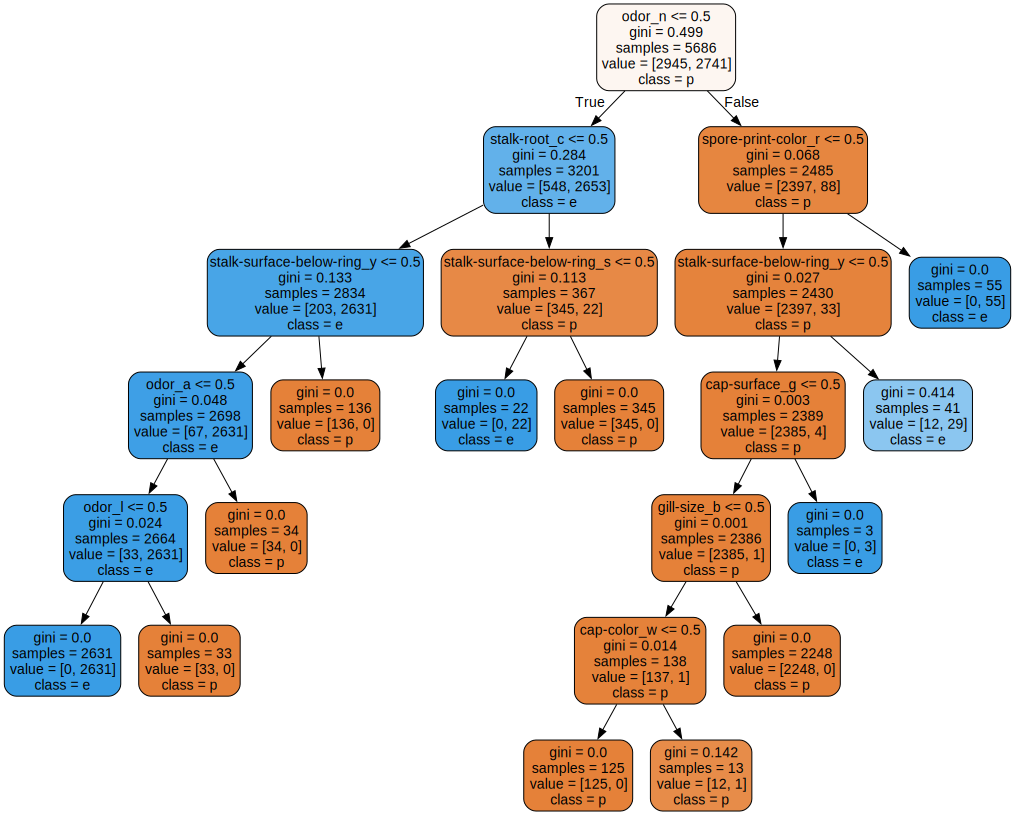

In [18]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_best, out_file='tree.dot',
                class_names=beoseot['class'].unique(),
                feature_names=dt_best.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# (2) dot파일 출력
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

### [2] 로지스틱 회귀

In [19]:
lr_params = {'solver' : ['liblinear', 'lbfgs'],
             'max_iter': [100, 200, 300],
             'C': [1, 0.1, 0.01]}

In [20]:
lr = LogisticRegression()

# GridSearchCV 객체 생성
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
lr_grid_search.fit(X_train_dum, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [21]:
lr_best = lr_grid_search.best_estimator_

print(f"최적의 하이퍼 파라미터 : {lr_grid_search.best_params_}")
print(f"훈련 세트 점수 : {lr_best.score(X_train_dum, y_train):.4f}")
print(f"테스트 세트 점수 : {lr_best.score(X_test_dum, y_test):.4f}")

최적의 하이퍼 파라미터 : {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
훈련 세트 점수 : 0.9998
테스트 세트 점수 : 0.9992


### [3] 보팅

In [22]:
vt_params = {'voting' : ['hard', 'soft']}

In [23]:
vt = VotingClassifier(estimators=[('dt', dt_best), ('lr', lr_best)])

# GridSearchCV 객체 생성
vt_grid_search = GridSearchCV(estimator=vt, param_grid=vt_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
vt_grid_search.fit(X_train_dum, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dt',
                                                     DecisionTreeClassifier(max_depth=6,
                                                                            min_samples_leaf=2,
                                                                            min_samples_split=100)),
                                                    ('lr',
                                                     LogisticRegression(C=1,
                                                                        solver='liblinear'))]),
             param_grid={'voting': ['hard', 'soft']}, scoring='accuracy')

In [24]:
vt_best = vt_grid_search.best_estimator_

print(f"최적의 하이퍼 파라미터 : {vt_grid_search.best_params_}")
print(f"훈련 세트 점수 : {vt_best.score(X_train_dum, y_train):.4f}")
print(f"테스트 세트 점수 : {vt_best.score(X_test_dum, y_test):.4f}")

최적의 하이퍼 파라미터 : {'voting': 'soft'}
훈련 세트 점수 : 0.9998
테스트 세트 점수 : 0.9988


### [4] 중요한 변수 추출하기

In [25]:
feature_importances_dict = {key : value for key, value in zip(dt_best.feature_names_in_, dt_best.feature_importances_.round(3))}

sorted(feature_importances_dict.items(), key = lambda x : x[1], reverse = True)

[('odor_n', 0.624),
 ('stalk-root_c', 0.174),
 ('stalk-surface-below-ring_y', 0.102),
 ('spore-print-color_r', 0.037),
 ('odor_a', 0.023),
 ('odor_l', 0.023),
 ('stalk-surface-below-ring_s', 0.015),
 ('cap-surface_g', 0.002),
 ('cap-shape_b', 0.0),
 ('cap-shape_c', 0.0),
 ('cap-shape_f', 0.0),
 ('cap-shape_k', 0.0),
 ('cap-shape_s', 0.0),
 ('cap-shape_x', 0.0),
 ('cap-surface_f', 0.0),
 ('cap-surface_s', 0.0),
 ('cap-surface_y', 0.0),
 ('cap-color_b', 0.0),
 ('cap-color_c', 0.0),
 ('cap-color_e', 0.0),
 ('cap-color_g', 0.0),
 ('cap-color_n', 0.0),
 ('cap-color_p', 0.0),
 ('cap-color_r', 0.0),
 ('cap-color_u', 0.0),
 ('cap-color_w', 0.0),
 ('cap-color_y', 0.0),
 ('bruises_f', 0.0),
 ('bruises_t', 0.0),
 ('odor_c', 0.0),
 ('odor_f', 0.0),
 ('odor_m', 0.0),
 ('odor_p', 0.0),
 ('odor_s', 0.0),
 ('odor_y', 0.0),
 ('gill-attachment_a', 0.0),
 ('gill-attachment_f', 0.0),
 ('gill-spacing_c', 0.0),
 ('gill-spacing_w', 0.0),
 ('gill-size_b', 0.0),
 ('gill-size_n', 0.0),
 ('gill-color_b', 0.0),
 

> odor, stalk-root, spore-print-color, stalk-surface-below-ring, ring-type, cap-surface가 중요도 존재

#### odor: 버섯의 냄새
- 'a': 아몬드 향 (almond)
- 'l': 아니스 향 (anise)
- 'c': 크레오솟 향 (creosote)
- 'y': 생선 향 (fishy)
- 'f': 불쾌한 향 (foul)
- 'm': 머스크 향 (musty)
- 'n': 무향 (no odor)
- 'p': 매운 향 (pungent)
- 's': 흙냄새 (spicy)

#### spore-print-color: 버섯의 포자 색상
- 'k': 검은색 (black)
- 'n': 갈색 (brown)
- 'b': 베이지색 (buff)
- 'h': 초콜릿색 (chocolate)
- 'r': 녹색 (green)
- 'o': 주황색 (orange)
- 'u': 자주색 (purple)
- 'w': 하얀색 (white)
- 'y': 노란색 (yellow)

#### stalk-root: 버섯 자루의 뿌리 형태
- 'b': 부착된 뿌리 (bulbous)
- 'c': 묵은 뿌리 (club)
- 'u': 잔뿌리 (cup)
- 'e': 등뿌리 (equal)
- 'z': 끝이 없는 (rhizomorphs)
- 'r': 뿌리가 없음 (rooted)
- '?': 모름 (missing)

#### stalk-surface-below-ring: 버섯 자루의 아랫부분 표면 상태
- 'f': 섬유질의 (fibrous)
- 'y': 비늘이 있는 (scaly)
- 'k': 비단같은 (silky)
- 's': 매끈한 (smooth)

#### ring-type: 버섯 자루 고리의 유형
- 'c': 거미줄 모양 (cobwebby)
- 'e': 탈락형 (evanescent)
- 'f': 고리형 (flaring)
- 'l': 큰 고리형 (large)
- 'n': 없음 (none)
- 'p': 덮개형 (pendant)
- 's': 흔적형 (sheathing)
- 'z': 존속형 (zone)

#### cap-surface: 버섯 갓의 표면
- 'f': 섬유질의 (fibrous)
- 'g': 홈이 있는 (grooves)
- 'y': 비늘이 있는 (scaly)
- 's': 매끈한 (smooth)

### [5] 새로운 피쳐들로 다시 학습

In [26]:
new_featureDF = beoseot.loc[:, ['odor', 'stalk-root', 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', 'cap-surface']]
targetSR = beoseot['class']

new_featureDF

,odor,stalk-root,spore-print-color,stalk-surface-below-ring,ring-type,cap-surface
0,p,e,k,s,p,s
1,a,c,n,s,p,s
2,l,c,n,s,p,s
3,p,e,k,s,p,y
4,n,e,n,s,e,s
...,...,...,...,...,...,...
8119,n,?,b,s,p,s
8120,n,?,b,s,p,s
8121,n,?,b,s,p,s
8122,y,?,w,k,e,y


In [27]:
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
vt_model = VotingClassifier(estimators=[('dt', dt_model), ('lr', lr_model)])

dt_params = {'max_depth' : [2, 4, 6],
             'min_samples_split': [100, 200, 300],
             'min_samples_leaf': [2, 4, 6]}

lr_params = {'solver' : ['liblinear', 'lbfgs'],
             'max_iter': [100, 200, 300],
             'C': [1, 0.1, 0.01]}

vt_params = {'voting' : ['hard', 'soft']}

model_list = [dt_model, lr_model, vt_model]
params_list = [dt_params, lr_params, vt_params]

In [28]:
def model_grid_score(model, params, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size=0.8,
                                                    random_state=42)

    X_train_dum = pd.get_dummies(X_train)
    X_test_dum = pd.get_dummies(X_test)

    # print(f"X_train_dum.shape : {X_train_dum.shape}")
    # print(f"X_test_dum.shape : {X_test_dum.shape}")
    # print()

    # GridSearchCV 객체 생성
    model_grid_search = GridSearchCV(estimator=model, param_grid=params,
                                cv=5, scoring='accuracy')

    # 그리드 탐색 수행
    model_grid_search.fit(X_train_dum, y_train)

    model_best = model_grid_search.best_estimator_

    print(f"최적의 하이퍼 파라미터 : {model_grid_search.best_params_}")
    print(f"훈련 세트 점수 : {model_best.score(X_train_dum, y_train):.4f}")
    print(f"테스트 세트 점수 : {model_best.score(X_test_dum, y_test):.4f}")

    return model_grid_search.best_estimator_

In [29]:
for i in range(3):
    print(model_list[i])
    model_grid_score(model_list[i], params_list[i], new_featureDF, targetSR)
    print()

DecisionTreeClassifier()


최적의 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 100}
훈련 세트 점수 : 0.9978
테스트 세트 점수 : 0.9963

LogisticRegression()
최적의 하이퍼 파라미터 : {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
훈련 세트 점수 : 0.9992
테스트 세트 점수 : 0.9982

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])
최적의 하이퍼 파라미터 : {'voting': 'soft'}
훈련 세트 점수 : 0.9997
테스트 세트 점수 : 0.9988



> 변수의 차원을 효과적으로 줄이면서 모델의 성능은 유지시키는데 성공하였다.

### [6] 변수 추가로 튜닝

> 추가적으로 변수 중요도가 5% 이상인 컬럼이 존재하는 피쳐들만 선택해서 다시 학습 진행 (odor, stalk-root)

#### odor: 버섯의 냄새
- 'a': 아몬드 향 (almond)
- 'l': 아니스 향 (anise)
- 'c': 크레오솟 향 (creosote)
- 'y': 생선 향 (fishy)
- 'f': 불쾌한 향 (foul)
- 'm': 머스크 향 (musty)
- 'n': 무향 (no odor)
- 'p': 매운 향 (pungent)
- 's': 흙냄새 (spicy)

#### stalk-root: 버섯 자루의 뿌리 형태
- 'b': 부착된 뿌리 (bulbous)
- 'c': 묵은 뿌리 (club)
- 'u': 잔뿌리 (cup)
- 'e': 등뿌리 (equal)
- 'z': 끝이 없는 (rhizomorphs)
- 'r': 뿌리가 없음 (rooted)
- '?': 모름 (missing)

In [30]:
final_featureDF = beoseot.loc[:, ['odor', 'stalk-root']]
targetSR = beoseot['class']

final_featureDF

,odor,stalk-root
0,p,e
1,a,c
2,l,c
3,p,e
4,n,e
...,...,...
8119,n,?
8120,n,?
8121,n,?
8122,y,?


In [31]:
for i in range(3):
    print(model_list[i])
    model_grid_score(model_list[i], params_list[i], final_featureDF, targetSR)
    print()

DecisionTreeClassifier()
최적의 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 100}
훈련 세트 점수 : 0.9858
테스트 세트 점수 : 0.9877

LogisticRegression()
최적의 하이퍼 파라미터 : {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
훈련 세트 점수 : 0.9851
테스트 세트 점수 : 0.9858

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])
최적의 하이퍼 파라미터 : {'voting': 'soft'}
훈련 세트 점수 : 0.9858
테스트 세트 점수 : 0.9877



### [7] 가장 중요한 odor 변수만 넣고 학습

#### odor: 버섯의 냄새
- 'a': 아몬드 향 (almond)
- 'l': 아니스 향 (anise)
- 'c': 크레오솟 향 (creosote)
- 'y': 생선 향 (fishy)
- 'f': 불쾌한 향 (foul)
- 'm': 머스크 향 (musty)
- 'n': 무향 (no odor)
- 'p': 매운 향 (pungent)
- 's': 흙냄새 (spicy)

In [32]:
final_featureDF2 = beoseot.loc[:, ['odor']]
targetSR = beoseot['class']

final_featureDF2

,odor
0,p
1,a
2,l
3,p
4,n
...,...
8119,n
8120,n
8121,n
8122,y


In [33]:
for i in range(3):
    print(model_list[i])
    model_grid_score(model_list[i], params_list[i], final_featureDF2, targetSR)
    print()

DecisionTreeClassifier()
최적의 하이퍼 파라미터 : {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 100}
훈련 세트 점수 : 0.9851
테스트 세트 점수 : 0.9858

LogisticRegression()
최적의 하이퍼 파라미터 : {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
훈련 세트 점수 : 0.9851
테스트 세트 점수 : 0.9858

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])
최적의 하이퍼 파라미터 : {'voting': 'hard'}
훈련 세트 점수 : 0.9851
테스트 세트 점수 : 0.9858



> 결국 버섯 냄새만으로도 독버섯의 유뮤 파악이 가능한 것으로 보임

### [8] 어떤 버섯을 먹어야 생존할 수 있는지 확인하기 

최적의 하이퍼 파라미터 : {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 100}
훈련 세트 점수 : 0.9851
테스트 세트 점수 : 0.9858


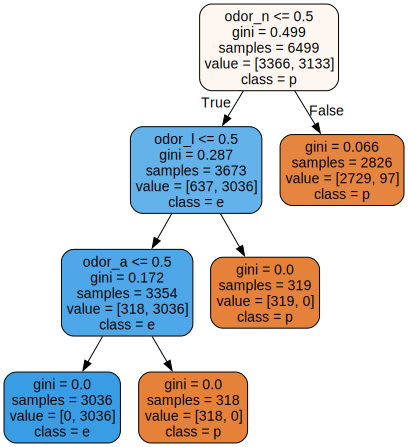

In [34]:
# DecisionTree 모델
final_dt = model_grid_score(DecisionTreeClassifier(), params_list[0], final_featureDF2, targetSR)

# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
export_graphviz(final_dt, out_file='tree.dot',
                class_names=beoseot['class'].unique(),
                feature_names=final_dt.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# (2) dot파일 출력
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

In [35]:
data = pd.DataFrame({'odor' : ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']})

data_dum = pd.get_dummies(data)
data_dum

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,True,False


In [36]:
smell_name = ['아몬드 향', '아니스 향', '크레오솟 향', '생선 향',
              '불쾌한 향', '머스크 향', '무향', '매운 향', '흙냄새']

smell_code = ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']

In [37]:
final_dt.predict(data_dum.iloc[[6],:])

array(['e'], dtype=object)

In [38]:
for i in range(len(data_dum)):
    if final_dt.predict(data_dum.iloc[[i],:])[0] == 'e':
        print(f"{smell_name[i]} : 먹어 볼 만 함 (생존 확률 : {final_dt.predict_proba(data_dum.iloc[[i],:])[0][0]*100:.2f}%)\n")
    else:
        print(f"{smell_name[i]} : 먹는거 비추천 (생존 확률 : {final_dt.predict_proba(data_dum.iloc[[i],:])[0][0]*100:.2f}%)\n")


아몬드 향 : 먹어 볼 만 함 (생존 확률 : 100.00%)

아니스 향 : 먹어 볼 만 함 (생존 확률 : 100.00%)

크레오솟 향 : 먹는거 비추천 (생존 확률 : 0.00%)

생선 향 : 먹는거 비추천 (생존 확률 : 0.00%)

불쾌한 향 : 먹는거 비추천 (생존 확률 : 0.00%)

머스크 향 : 먹는거 비추천 (생존 확률 : 0.00%)

무향 : 먹어 볼 만 함 (생존 확률 : 96.57%)

매운 향 : 먹는거 비추천 (생존 확률 : 0.00%)

흙냄새 : 먹는거 비추천 (생존 확률 : 0.00%)



> 하지만 목숨이 걸린 일이기 때문에 무향 처럼 독버섯이 섞여 있는 종류는 무모한 도전을 하지 않는 것을 추천

In [39]:
for i in range(len(smell_name)):
    print(f"{smell_name[i]}\n{beoseot[beoseot['odor'] == smell_code[i]]['class'].value_counts()}\n")

아몬드 향
class
e    400
Name: count, dtype: int64

아니스 향
class
e    400
Name: count, dtype: int64

크레오솟 향
class
p    192
Name: count, dtype: int64

생선 향
class
p    576
Name: count, dtype: int64

불쾌한 향
class
p    2160
Name: count, dtype: int64

머스크 향
class
p    36
Name: count, dtype: int64

무향
class
e    3408
p     120
Name: count, dtype: int64

매운 향
class
p    256
Name: count, dtype: int64

흙냄새
class
p    576
Name: count, dtype: int64

